Q1 -ab

In [25]:
import pandas as pd
import collections

df = pd.read_csv('./student-mat.csv', sep=';')

#binario nominal

df['school'] = df['school'].map({'GP': 0, 'MS': 1 })
df['sex'] = df['sex'].map({'F': 0, 'M': 1 })
df['address'] = df['address'].map({'U': 0, 'R': 1 })
df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1 })
df['Pstatus'] = df['Pstatus'].map({'T': 0, 'A': 1 })
df['schoolsup'] = df['schoolsup'].map({'yes': 1, 'no': 0})
df['famsup'] = df['famsup'].map({'yes': 1, 'no': 0})
df['paid'] = df['paid'].map({'yes': 1, 'no': 0})
df['activities'] = df['activities'].map({'yes': 1, 'no': 0})
df['nursery'] = df['nursery'].map({'yes': 1, 'no': 0})
df['higher'] = df['higher'].map({'yes': 1, 'no': 0})
df['internet'] = df['internet'].map({'yes': 1, 'no': 0})
df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})

## não binário nominal - cria novos atrbutos e elimina o antigo
df['MjobTeacher'] = df['Mjob'].map(collections.defaultdict(lambda: 0, { 'teacher': 1}))
df['MjobHealth'] = df['Mjob'].map(collections.defaultdict(lambda: 0, { 'health': 1}))
df['MjobServices'] = df['Mjob'].map(collections.defaultdict(lambda: 0, { 'services': 1}))
df['MjobAtHome'] = df['Mjob'].map(collections.defaultdict(lambda: 0, { 'at_home': 1}))
df['MjobOther'] = df['Mjob'].map(collections.defaultdict(lambda: 0, { 'other': 1}))
del df['Mjob']

df['FjobTeacher'] = df['Fjob'].map(collections.defaultdict(lambda: 0, { 'teacher': 1}))
df['FjobHealth'] = df['Fjob'].map(collections.defaultdict(lambda: 0, { 'health': 1}))
df['FjobServices'] = df['Fjob'].map(collections.defaultdict(lambda: 0, { 'services': 1}))
df['FjobAtHome'] = df['Fjob'].map(collections.defaultdict(lambda: 0, { 'at_home': 1}))
df['FjobOther'] = df['Fjob'].map(collections.defaultdict(lambda: 0, { 'other': 1}))
del df['Fjob']

df['reasonClose'] = df['reason'].map(collections.defaultdict(lambda: 0, { 'home': 1}))
df['reasonSchool'] = df['reason'].map(collections.defaultdict(lambda: 0, { 'reputation': 1}))
df['reasonCourse'] = df['reason'].map(collections.defaultdict(lambda: 0, { 'course': 1}))
df['reasonOther'] = df['reason'].map(collections.defaultdict(lambda: 0, { 'other': 1}))
del df['reason']

df['guardianMother'] = df['guardian'].map(collections.defaultdict(lambda: 0, { 'mother': 1}))
df['guardianFather'] = df['guardian'].map(collections.defaultdict(lambda: 0, { 'father': 1}))
df['guardianOther'] = df['guardian'].map(collections.defaultdict(lambda: 0, { 'other': 1}))
del df['guardian']

df.to_csv('./student-matResultado.csv', sep=';', index=False)


Q1 - cd

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import  KNeighborsRegressor

df = pd.read_csv('./student-matResultado.csv', sep=';')
acc1 = []
acc2 = []
target = df.pop("G3")

def std(accuracies, mean):
    total = 0
    for k in accuracies:
        total += (k - mean) ** 2

    result = (total / len(accuracies)) ** 0.5

    return result

for i in range(100):
    X_train, X_test, Y_train, Y_test = train_test_split(df, target, test_size=0.5)

    knn1 = KNeighborsRegressor(n_neighbors=1, weights="uniform", metric="euclidean")
    knn1.fit(X_train, Y_train)
    acc1.append(knn1.score(X_test,Y_test))

    del X_train['school']
    del X_train['sex']
    del X_train['address']
    del X_train['famsize']
    del X_train['Pstatus']
    del X_train['Medu']
    del X_train['Fedu']
    
    del X_train['MjobTeacher']
    del X_train['MjobServices']
    del X_train['MjobOther']

    del X_train['FjobTeacher']
    del X_train['FjobHealth']
    del X_train['FjobServices']
    del X_train['FjobAtHome']
    del X_train['FjobOther']

    del X_train['reasonClose']
    del X_train['reasonSchool']
    del X_train['reasonCourse']
    del X_train['reasonOther']

    del X_train['guardianMother']
    del X_train['guardianFather']
    del X_train['guardianOther']

    del X_train['schoolsup']
    del X_train['famsup']
    del X_train['paid']
    del X_train['activities']
    del X_train['nursery']
    del X_train['higher']
    del X_train['internet']
    del X_train['romantic']

    del X_test['school']
    del X_test['sex']
    del X_test['address']
    del X_test['famsize']
    del X_test['Pstatus']
    del X_test['Medu']
    del X_test['Fedu']
    
    del X_test['MjobTeacher']
    del X_test['MjobServices']
    del X_test['MjobOther']

    del X_test['FjobTeacher']
    del X_test['FjobHealth']
    del X_test['FjobServices']
    del X_test['FjobAtHome']
    del X_test['FjobOther']

    del X_test['reasonClose']
    del X_test['reasonSchool']
    del X_test['reasonCourse']
    del X_test['reasonOther']

    del X_test['guardianMother']
    del X_test['guardianFather']
    del X_test['guardianOther']

    del X_test['schoolsup']
    del X_test['famsup']
    del X_test['paid']
    del X_test['activities']
    del X_test['nursery']
    del X_test['higher']
    del X_test['internet']
    del X_test['romantic']

    knn2 = KNeighborsRegressor(n_neighbors=1, weights="uniform", metric="euclidean")
    knn2.fit(X_train, Y_train)
    acc2.append(knn2.score(X_test, Y_test))

media = sum(acc1)/len(acc1)
desvio = std(acc1,media)
intervalo1 = [(media-(1.96*desvio)),(media+(1.96*desvio))]
print(f"Media: {media}")
print(f"Intervalo: {intervalo1}"+'\n')

media = sum(acc2)/len(acc2)
desvio = std(acc2,media)
intervalo1 = [(media-(1.96*desvio)),(media+(1.96*desvio))]
print(f"Media: {media}")
print(f"Intervalo: {intervalo1}"+'\n')


Media: 0.7068799122516448
Intervalo: [0.6081720918281037, 0.8055877326751859]

Media: 0.7574390998608128
Intervalo: [0.6668693177385209, 0.8480088819831048]



Q2 - ab

In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('forestfires.csv', sep=',')

df['month'] = df['month'].map({
  'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
  'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
})


df['day'] = df['day'].map({
  'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4,
  'fri': 5, 'sat': 6, 'sun': 7
})

df['area'] = np.log(df.area + 1)

df.to_csv('forestfiresResultado.csv', sep=';', index=False)

Q4

In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import scipy as sp                                                         
import scipy.stats 
from scipy import stats
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

In [29]:
nomes_col = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

df = pd.read_csv("processed.hungarian.data", names=nomes_col)

x = np.array(df[df.columns[1:13:]])
x2 = df[df.columns[1:13:]]

y = np.array(df[df.columns[:1:]]).flatten()
y2 = df[df.columns[:1:]]

In [30]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      294 non-null    int64  
 1   sex                      294 non-null    int64  
 2   chest_pain_type          294 non-null    int64  
 3   resting_blood_pressure   293 non-null    float64
 4   cholesterol              271 non-null    float64
 5   fasting_blood_sugar      286 non-null    float64
 6   rest_ecg                 293 non-null    float64
 7   max_heart_rate_achieved  293 non-null    float64
 8   exercise_induced_angina  293 non-null    float64
 9   st_depression            294 non-null    float64
 10  st_slope                 104 non-null    float64
 11  num_major_vessels        3 non-null      float64
 12  thalassemia              28 non-null     float64
 13  target                   294 non-null    int64  
dtypes: float64(10), int64(4)
m

age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       1
cholesterol                 23
fasting_blood_sugar          8
rest_ecg                     1
max_heart_rate_achieved      1
exercise_induced_angina      1
st_depression                0
st_slope                   190
num_major_vessels          291
thalassemia                266
target                       0
dtype: int64

<AxesSubplot: title={'center': 'Missing values in percentage'}, ylabel='percentage'>

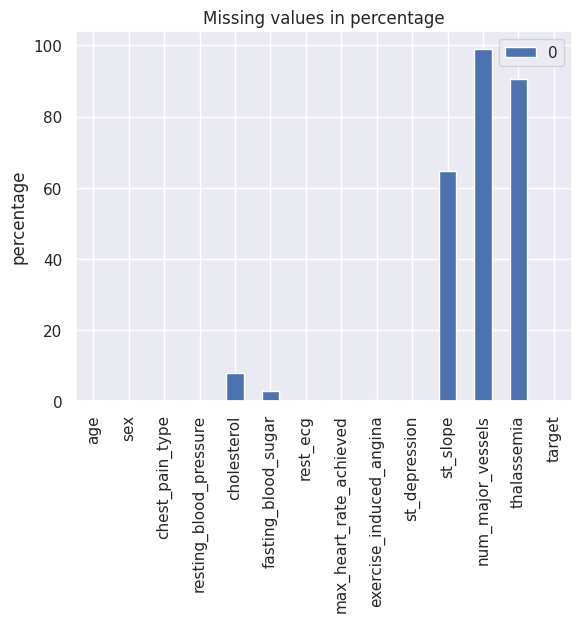

In [31]:
sns.set()
miss_vals = pd.DataFrame(df.isnull().sum() / len(df) * 100)
miss_vals.plot(kind='bar',title='Missing values in percentage',ylabel='percentage')

In [32]:
# # Identifica o valor mais frequente na coluna
# print(df.num_major_vessels.value_counts())
# num_major_vessels_freq = df.num_major_vessels.value_counts()[0]

# # preencher a coluna com o valor mais frequente
# df.num_major_vessels.fillna(num_major_vessels_freq, inplace=True)
# df.num_major_vessels.isnull().sum()

In [33]:
# # extrair a mediana
# thalassemia_mediana = df.thalassemia.median()
# print(thalassemia_mediana)

# # preencher a coluna com a mediana
# df.thalassemia.fillna(thalassemia_mediana, inplace=True)

# # checkar se ainda tem valor ausente
# df.thalassemia.isnull().sum()

In [34]:
df.isnull().sum()

age                          0
sex                          0
chest_pain_type              0
resting_blood_pressure       1
cholesterol                 23
fasting_blood_sugar          8
rest_ecg                     1
max_heart_rate_achieved      1
exercise_induced_angina      1
st_depression                0
st_slope                   190
num_major_vessels          291
thalassemia                266
target                       0
dtype: int64

In [35]:
print(f'Number of null values before: {df.resting_blood_pressure.isnull().sum()}')
 
# A classe SimpleImputer funciona com o método fit_transform que executa os métodos fit() e transform() em uma única linha.
imp = SimpleImputer(strategy='mean')

# Preenche os valores ausentes com a média da coluna
df['resting_blood_pressure'] = imp.fit_transform(df[['resting_blood_pressure']])
 
print(f'Number of null values after: {df.resting_blood_pressure.isnull().sum()}')

Number of null values before: 1
Number of null values after: 0


In [36]:
# função para definir os parâmetros a serem usados na classe SimpleImputer().
def get_parameters(df):
    parameters = {}
    for col in df.columns[df.isnull().any()]:
 
        if df[col].dtype == 'float64' or df[col].dtype == 'int64' or df[col].dtype =='int32':
            strategy = 'mean'
        else:
            strategy = 'most_frequent'
        missing_values = df[col][df[col].isnull()].values[0]
        parameters[col] = {'missing_values':missing_values, 'strategy':strategy}
    return parameters

parameters = get_parameters(df)

In [37]:
# percorra cada coluna para transformá-la.
for col, param in parameters.items():
    missing_values = param['missing_values']
    strategy = param['strategy']
    imp = SimpleImputer(missing_values=missing_values,strategy=strategy)
    df[col] = imp.fit_transform(df[[col]])
 
df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [38]:
# Para os valores ausentes preenchidos com um ponto de interrogação ?

df[df == 9999] = np.nan
df[df == '?'] = np.nan 

df.isnull().sum()

age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate_achieved    0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64

In [39]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64', 'int32']).columns
print(num_cols)
 
# Impute missing values
for col in num_cols:
    fill_value = df[col].mean()
    df[col].fillna(fill_value, inplace=True)
 
# MinMaxScaler() coloca todos os valores numéricos em uma escala de 0 a 1.
minmax = MinMaxScaler()
df[num_cols] = minmax.fit_transform(df[num_cols])
df[num_cols]

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')


,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,0.000000,1.0,0.333333,0.351852,0.090734,0.0,1.0,0.953704,0.0,0.0,0.447115,0.0,0.660714,0.0
1,0.026316,1.0,0.333333,0.259259,0.305019,0.0,0.0,0.722222,0.0,0.0,0.447115,0.0,0.660714,0.0
2,0.026316,1.0,0.333333,0.444444,0.320171,0.0,0.0,0.814815,0.0,0.0,0.447115,0.0,0.660714,0.0
3,0.052632,0.0,0.000000,0.722222,0.293436,0.0,0.5,0.814815,0.0,0.0,0.447115,0.0,0.750000,0.0
4,0.078947,0.0,0.333333,0.074074,0.258687,0.0,0.5,0.629630,0.0,0.0,0.447115,0.0,0.660714,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.631579,1.0,1.000000,0.629630,0.474903,0.0,0.0,0.111111,1.0,0.5,0.447115,0.0,0.660714,1.0
290,0.684211,0.0,0.666667,0.351852,0.403475,0.0,0.5,0.166667,1.0,0.0,0.500000,0.0,0.660714,1.0
291,0.736842,1.0,1.000000,0.583333,0.496139,1.0,0.0,0.629630,1.0,0.6,0.500000,0.0,0.660714,1.0
292,0.789474,0.0,0.333333,0.814815,0.594595,0.0,0.0,0.259259,1.0,0.2,0.500000,0.0,1.000000,1.0


In [73]:
x = np.array(df[df.columns[0:3:]])
y = np.array(df[df.columns[-1::]]).flatten()

skf = StratifiedKFold(n_splits = 100)

classificador = KNeighborsClassifier(n_neighbors=1)

lists_rates = []

for train_index, test_index in skf.split(x,y):
    x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.1)

    classificador.fit(x_train, y_train)
    taxas = classificador.score(x_test, y_test)
    lists_rates.append(taxas)
    y_pred = classificador.predict(x_test)

print(lists_rates)

[0.5333333333333333, 0.6666666666666666, 0.8666666666666667, 0.5333333333333333, 0.6666666666666666, 0.5666666666666667, 0.7333333333333333, 0.7, 0.8, 0.7666666666666667, 0.6333333333333333, 0.7333333333333333, 0.8, 0.8, 0.6666666666666666, 0.8, 0.6, 0.5, 0.6, 0.9, 0.6, 0.8333333333333334, 0.6, 0.6, 0.4, 0.6666666666666666, 0.6333333333333333, 0.7333333333333333, 0.6333333333333333, 0.6333333333333333, 0.5666666666666667, 0.7333333333333333, 0.7333333333333333, 0.8, 0.8666666666666667, 0.8333333333333334, 0.7666666666666667, 0.8, 0.6333333333333333, 0.5, 0.5666666666666667, 0.6, 0.7666666666666667, 0.7, 0.7, 0.8333333333333334, 0.7333333333333333, 0.6, 0.8333333333333334, 0.7, 0.6333333333333333, 0.7, 0.5, 0.6666666666666666, 0.7333333333333333, 0.5333333333333333, 0.7333333333333333, 0.6, 0.6333333333333333, 0.7, 0.6333333333333333, 0.7, 0.5333333333333333, 0.7333333333333333, 0.7666666666666667, 0.6666666666666666, 0.6, 0.5333333333333333, 0.6666666666666666, 0.7, 0.7666666666666667,

In [97]:
def calc_separate_averages(lists_rates):

    exit = {}
    aux = []
    
    for x in range(len(lists_rates)): 
        # calcula a media de um numpy rray 
        aux.append(np.mean(lists_rates[x]))          
        exit[x+1] = aux
        aux = []
    return aux


In [69]:
def calc_confidence_interval(total_average, total_differences):
        for x in range(len(array_taxas)):
            
            standard_deviation = np.std(array_taxas[x])
            standard_error = standard_deviation/np.sqrt(len(array_taxas[x]))
            multi = abs(stats.distributions.norm.ppf(0.025))

            print(x+1, (array_taxas[x] - multi*standard_error, array_taxas[x] + multi*standard_error))

In [108]:
#calcular a matriz média                                               
total_average = np.mean(lists_rates)                                           
print('media:{}'.format(total_average))                                            

desvio_padrao = np.std(lists_rates)                                          
conf_int = scipy.stats.norm.interval(0.95, loc=total_average, scale=desvio_padrao) 

print('\n')
print("intervalo de confiança: ")
print(conf_int)

media:0.6783333333333335


intervalo de confiança: 
(0.4893494813419292, 0.8673171853247377)
